In [1]:
%matplotlib inline

In [2]:
%run notebook_setup

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


theano version: 1.0.4


pymc3 version: 3.7


exoplanet version: 0.2.4.dev6+g2171caa


In [3]:
import exoplanet as xo
import theano
import theano.tensor as tt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
kernel = xo.gp.terms.SHOTerm(S0=1.0, w0=2 * np.pi / 5.0, Q=2)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


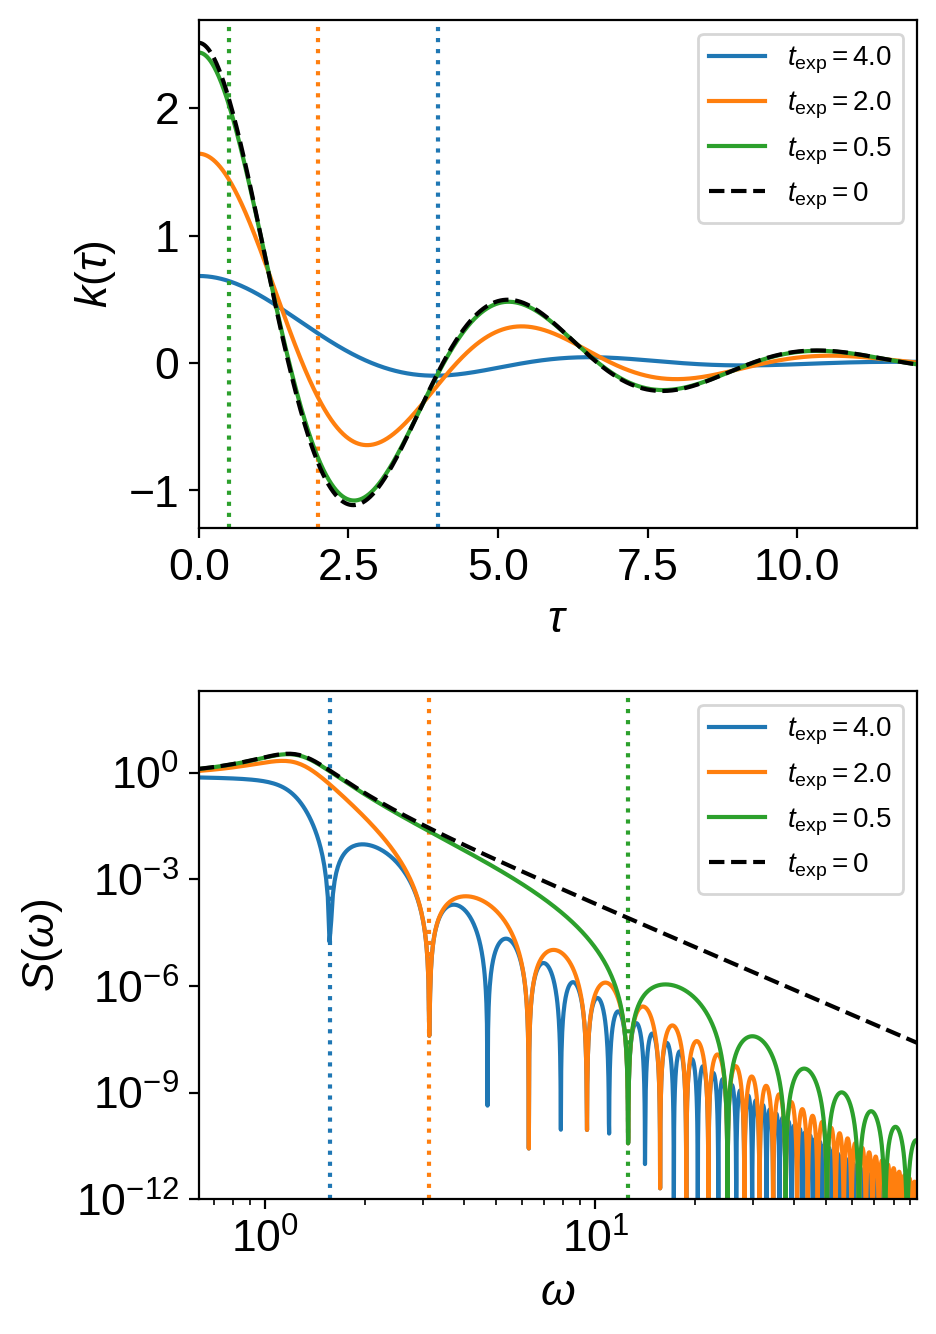

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 7))

tau = np.linspace(0, 12, 5000)
w = 2 * np.pi * np.linspace(0.1, 15, 5000)

for i, dt in enumerate([4.0, 2.0, 0.5]):
    integrated = xo.gp.terms.IntegratedTerm(kernel, dt)

    ax1.plot(
        tau,
        xo.gp.terms.IntegratedTerm(kernel, dt).value(tau).eval(),
        color="C{0}".format(i),
        label="$t_\mathrm{{exp}} = {0}$".format(dt),
    )
    ax1.axvline(dt, color="C{0}".format(i), linestyle="dotted")

    ax2.loglog(
        w,
        integrated.psd(w).eval(),
        color="C{0}".format(i),
        label="$t_\mathrm{{exp}} = {0}$".format(dt),
    )
    ax2.axvline(2 * np.pi / dt, color="C{0}".format(i), linestyle="dotted")

ax1.plot(tau, kernel.value(tau).eval(), "--k", label="$t_\mathrm{exp} = 0$")
ax1.legend(fontsize=10)
ax1.set_xlim(tau.min(), tau.max())
ax1.set_xlabel(r"$\tau$")
ax1.set_ylabel(r"$k(\tau)$")

ax2.plot(w, kernel.psd(w).eval(), "--k", label="$t_\mathrm{exp} = 0$")
ax2.legend(fontsize=10)
ax2.set_ylim(1e-12, 200.0)
ax2.set_xlim(w.min(), w.max())
ax2.set_xlabel("$\omega$")
ax2.set_ylabel("$S(\omega)$")

plt.tight_layout()

fig.savefig("celerite-integral.pdf", bbox_inches="tight")